<a href="https://colab.research.google.com/github/OrionXV/ISROProject/blob/main/ISROproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://drive.google.com/file/d/1GkwE0MAfiOrRlOqwLhZxuB7bKXgziEub/view?usp=sharing
#https://drive.google.com/file/d/1bRy8RDtWz5hbOn888XHSO3QToUAYCctS/view?usp=sharing
#!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1bRy8RDtWz5hbOn888XHSO3QToUAYCctS' -O lc.zip
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1bRy8RDtWz5hbOn888XHSO3QToUAYCctS' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1bRy8RDtWz5hbOn888XHSO3QToUAYCctS" -O lc.zip && rm -rf /tmp/cookies.txt

--2022-03-13 12:23:26--  https://docs.google.com/uc?export=download&confirm=t&id=1bRy8RDtWz5hbOn888XHSO3QToUAYCctS
Resolving docs.google.com (docs.google.com)... 74.125.31.101, 74.125.31.113, 74.125.31.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.31.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vslvl9aprue9qmecfhkifnrdonik5mnv/1647174150000/04989237414475792611/*/1bRy8RDtWz5hbOn888XHSO3QToUAYCctS?e=download [following]
--2022-03-13 12:23:26--  https://doc-14-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vslvl9aprue9qmecfhkifnrdonik5mnv/1647174150000/04989237414475792611/*/1bRy8RDtWz5hbOn888XHSO3QToUAYCctS?e=download
Resolving doc-14-a0-docs.googleusercontent.com (doc-14-a0-docs.googleusercontent.com)... 173.194.210.132, 2607:f8b0:400c:c0f::84
Connecting to doc-14-a0-docs.googleusercontent.com (doc-14-a0-do

In [2]:
#!unzip -q lc.zip
!unzip -q lc.zip

In [3]:
!pip install astropy

In [4]:
import astropy

In [5]:
from astropy.table import Table
import pandas as pd
import matplotlib.pyplot as plt
from astropy.timeseries import TimeSeries
from astropy import units
import numpy as np
%config InLineBackend.figure_format = 'retina'
import math
import astropy.convolution.convolve as conv
from astropy.convolution import Box1DKernel as box1d
from astropy.convolution import Gaussian1DKernel as g1d
from scipy.signal import find_peaks
from scipy.signal import peak_widths

In [6]:
def pdcreator(lc_path):
        lc_data = Table.read(lc_path)
        lc_data = lc_data.to_pandas()
        lc_data['TIME']=lc_data['TIME']-lc_data['TIME'][0]+1
        return lc_data

In [7]:
def binner(x,bin_size):
  Z=Table.from_pandas(x)
  Z=Z[['TIME','RATE','ERROR']]
  Z['TIME']=(np.trunc((x['TIME']-x['TIME'][0])/bin_size))*bin_size+x['TIME'][0]
  dat_grouped = Z.group_by(Z['TIME'])
  dat_binned = dat_grouped.groups.aggregate(np.median)
  dat_binned=dat_binned.to_pandas()
  
  return dat_binned

In [8]:
def plot_portion(dataframe,kind='line'):
  plt.figure(figsize=(20,8))   
  plt.plot(dataframe['TIME'],dataframe['RATE'])
  plt.show()
      

In [9]:
def plot_portion_2(dataframe,kind='line'):
  #plt.figure(figsize=(20,8))   
  dataframe.plot(x = 'TIME', y = 'RATE', sharey = True, sharex = True, figsize = (20, 8), subplots = True)
  #plt.show()

In [10]:
def convolve(data,width):
  data['RATE'] =conv(np.array(data['RATE']),kernel = g1d(width),boundary = 'extend')

In [11]:
def checker(data,mul,P):
  peaks = []
  for i in range(data.shape[0]-9*mul):
    if(data[i+3*mul]>data[i+2*mul] and data[i+2*mul]>data[i+1*mul] and data[i+1*mul]>data[i] and data[i+3*mul]>data[i]*P and data[i+3*mul] > data[i+6*mul]*P and data[i+3*mul]>data[i+4*mul] and data[i+4*mul]>data[i+5*mul] and data[i+5*mul]>data[i+6*mul]):
      peaks.append(i+3)
  return peaks

In [12]:
#lc1  = pdcreator('/content/lc/ch2_xsm_20200406_v1_level2.lc')
#c1 = pdcreator()
lc1 = pdcreator('/content/lc/ch2_xsm_20200406_v1_level2.lc')


In [13]:
import regex as re 
import os
import glob

path = '/content/lc'
extension = 'lc'
os.chdir(path)
result = glob.glob('*.{}'.format(extension))
print(result)

['ch2_xsm_20200316_v1_level2.lc', 'ch2_xsm_20190929_v1_level2.lc', 'ch2_xsm_20200317_v1_level2.lc', 'ch2_xsm_20200405_v1_level2.lc', 'ch2_xsm_20210331_v1_level2.lc', 'ch2_xsm_20200918_v1_level2.lc', 'ch2_xsm_20191004_v1_level2.lc', 'ch2_xsm_20200910_v1_level2.lc', 'ch2_xsm_20200406_v1_level2.lc', 'ch2_xsm_20190921_v1_level2.lc', 'ch2_xsm_20191001_v1_level2.lc', 'ch2_xsm_20190914_v1_level2.lc', 'ch2_xsm_20200307_v1_level2.lc', 'ch2_xsm_20200331_v1_level2.lc', 'ch2_xsm_20200404_v1_level2.lc', 'ch2_xsm_20190916_v1_level2.lc', 'ch2_xsm_20190926_v1_level2.lc', 'ch2_xsm_20210928_v1_level2.lc', 'ch2_xsm_20191003_v1_level2.lc', 'ch2_xsm_20190917_v1_level2.lc', 'ch2_xsm_20200410_v1_level2.lc', 'ch2_xsm_20190930_v1_level2.lc', 'ch2_xsm_20200924_v1_level2.lc', 'ch2_xsm_20200318_v1_level2.lc', 'ch2_xsm_20191005_v1_level2.lc', 'ch2_xsm_20191002_v1_level2.lc', 'ch2_xsm_20190918_v1_level2.lc', 'ch2_xsm_20200329_v1_level2.lc', 'ch2_xsm_20200409_v1_level2.lc', 'ch2_xsm_20200314_v1_level2.lc', 'ch2_xsm_

In [14]:
LC_files = []
for x in result:
    LC_files.append(pdcreator('/content/lc/' + x)) 

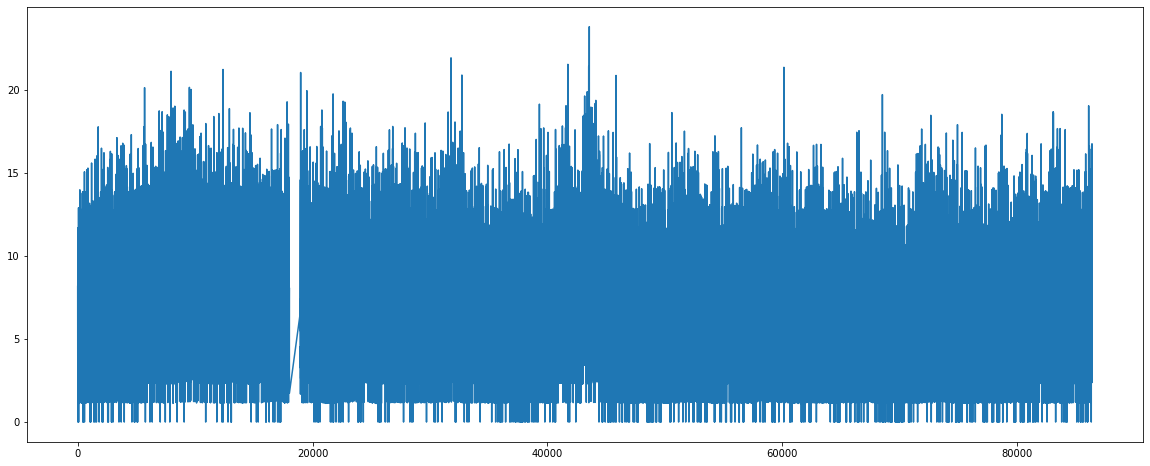

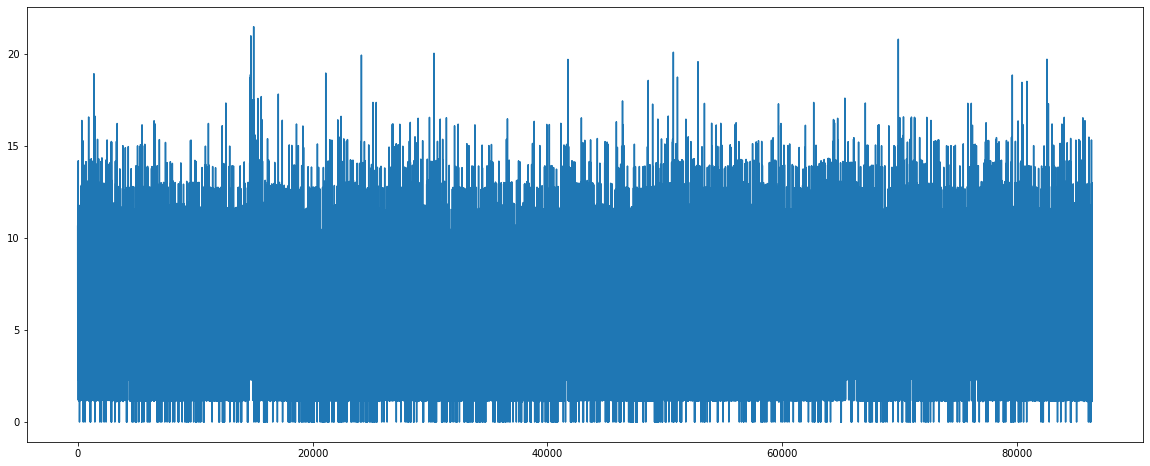

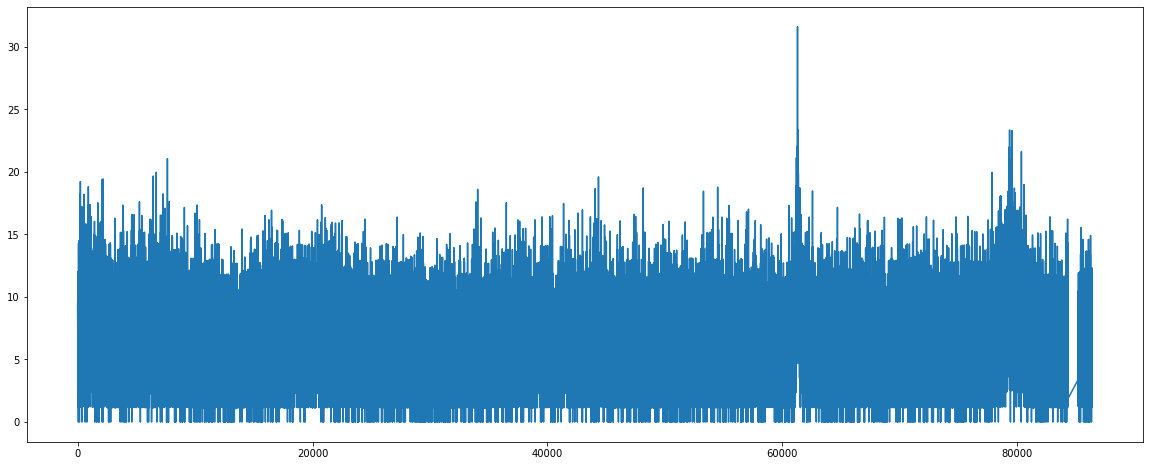

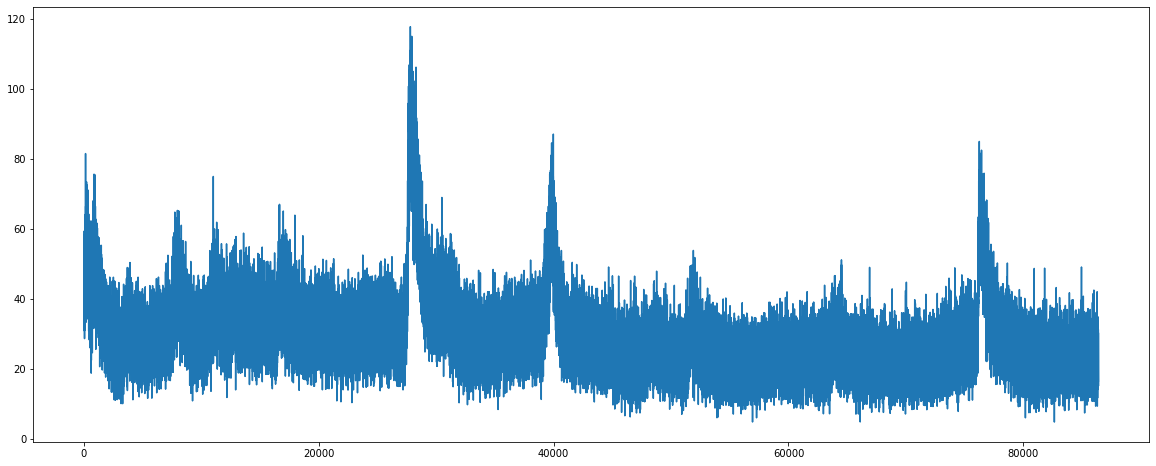

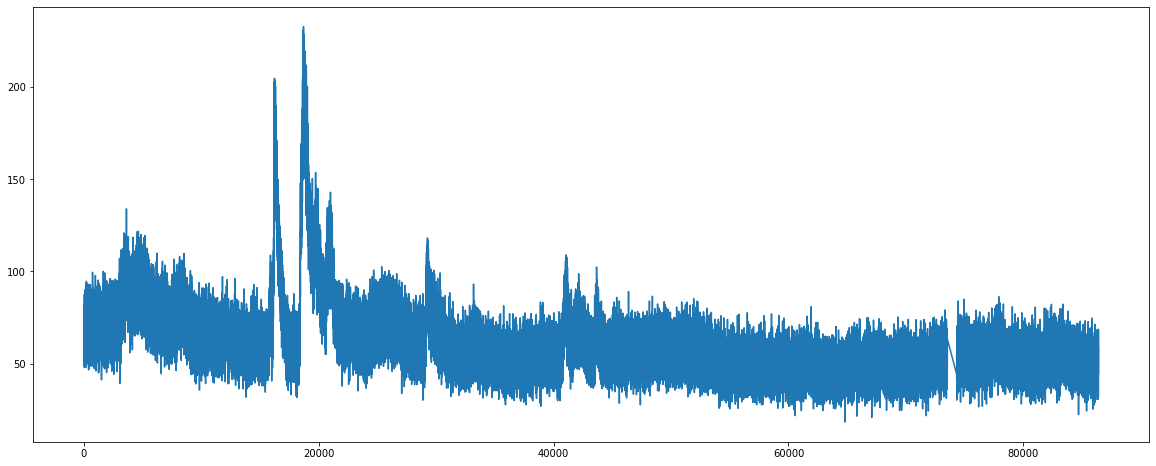

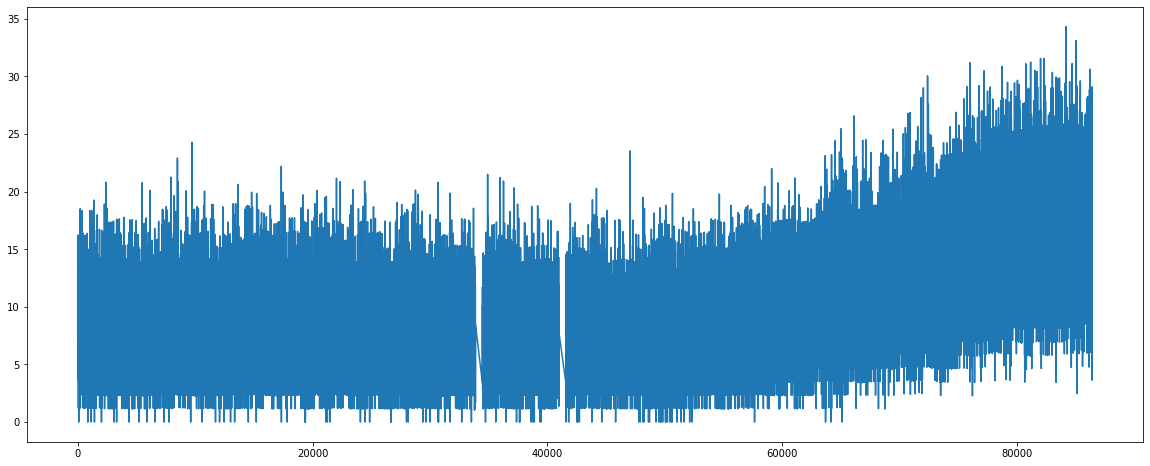

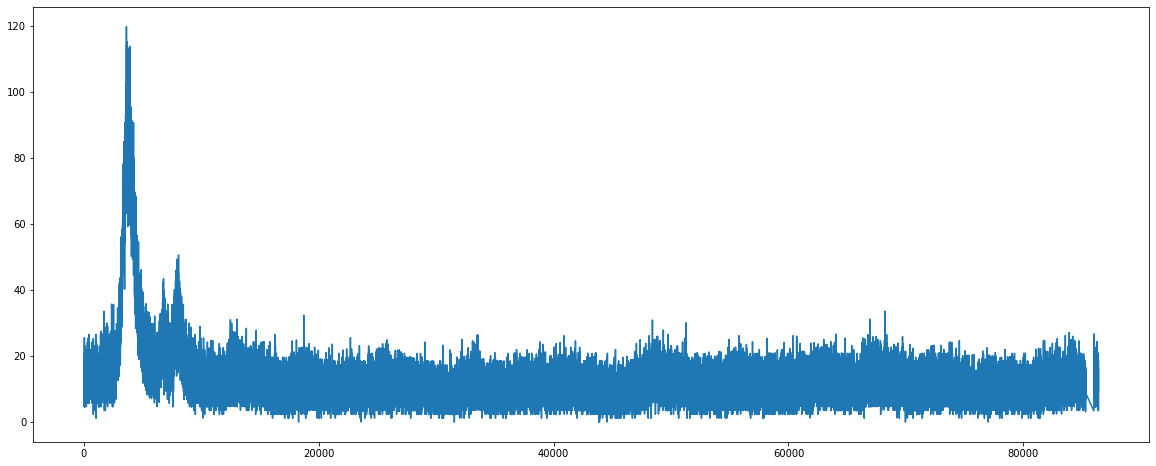

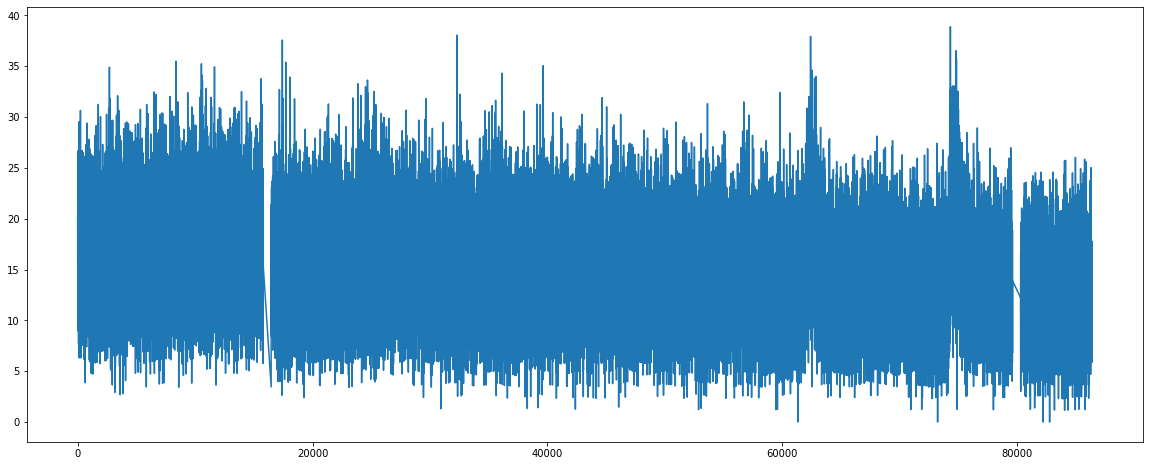

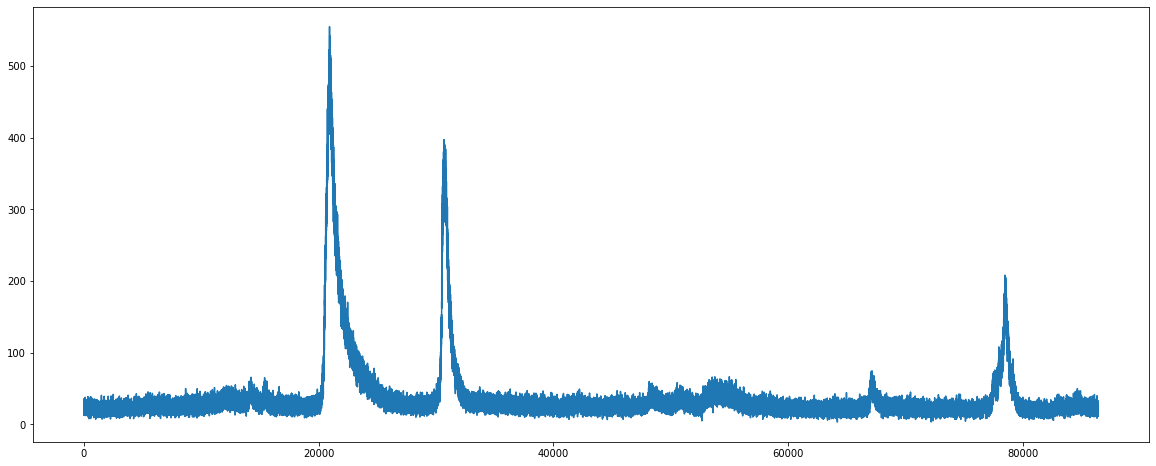

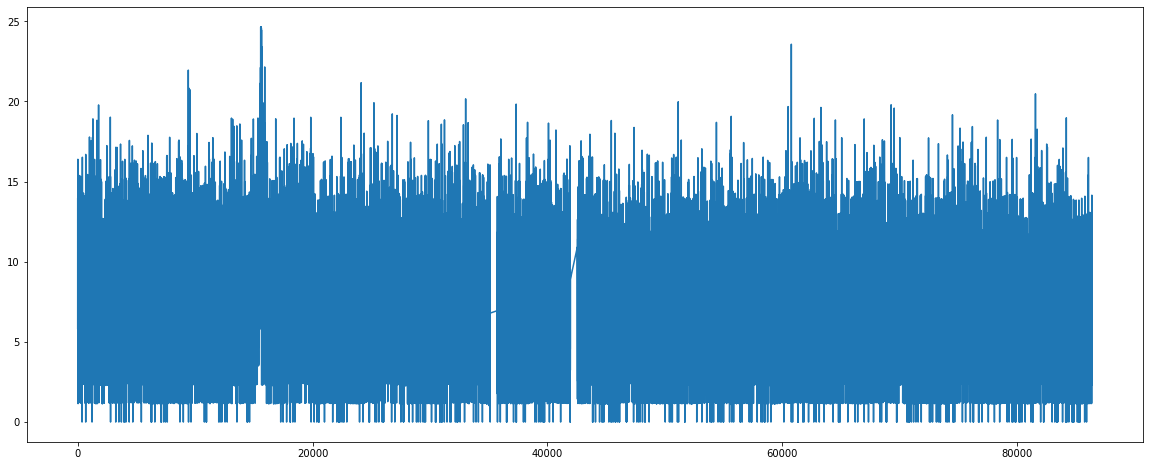

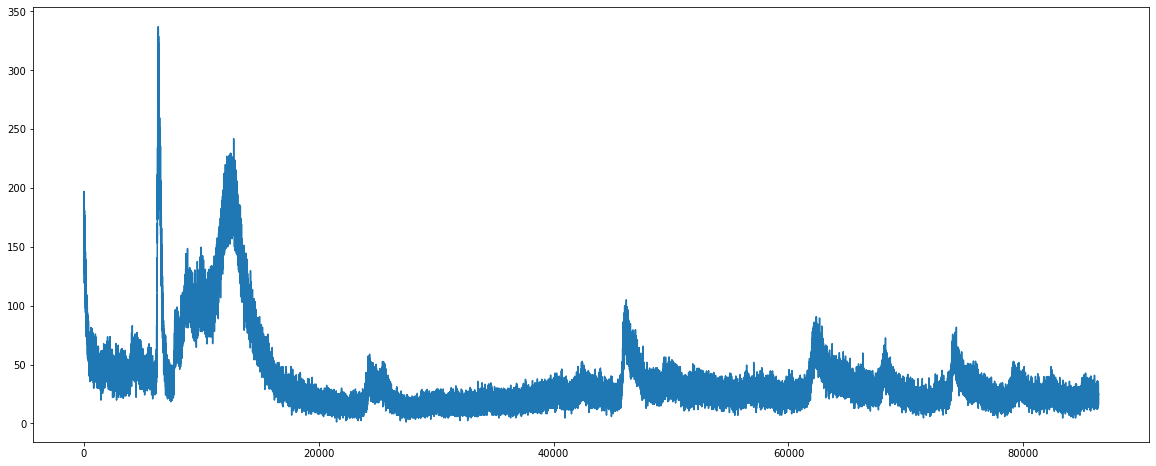

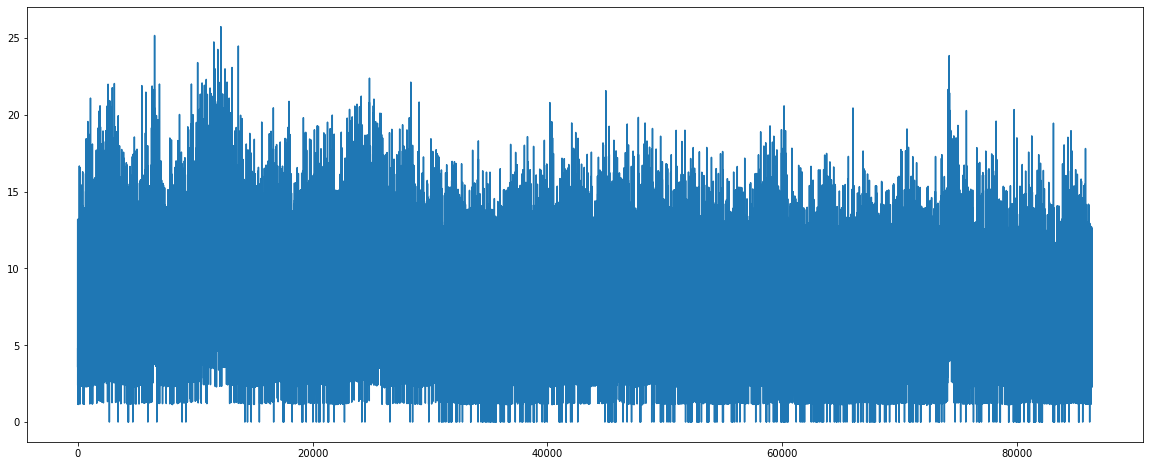

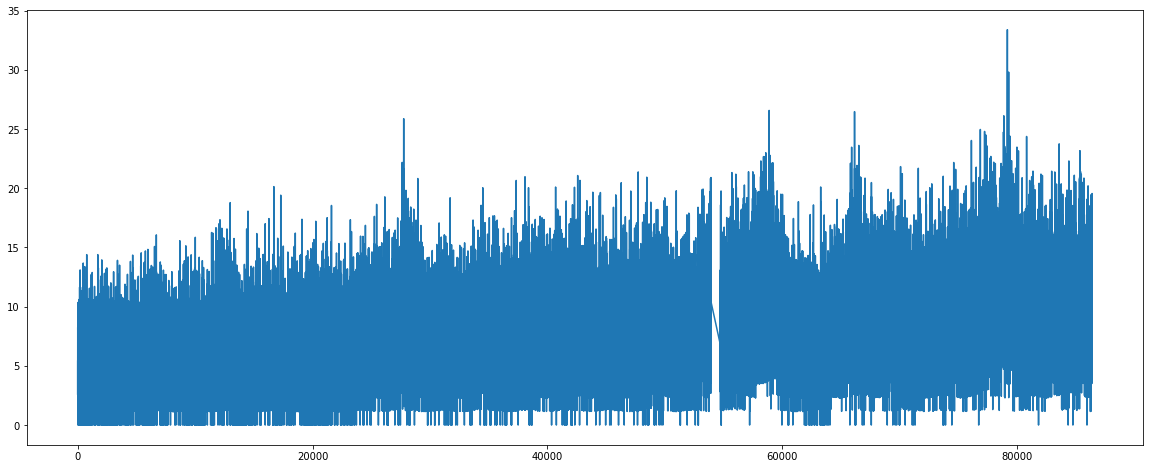

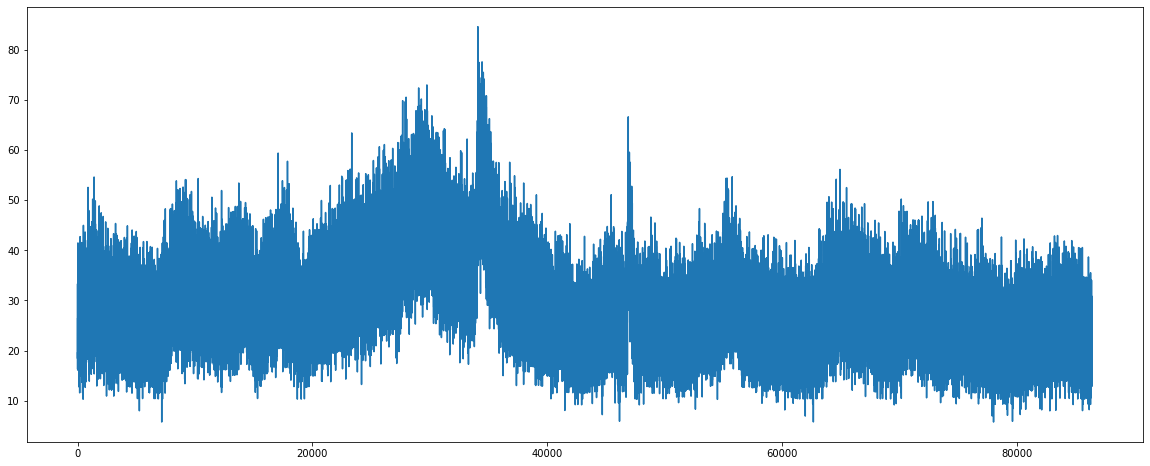

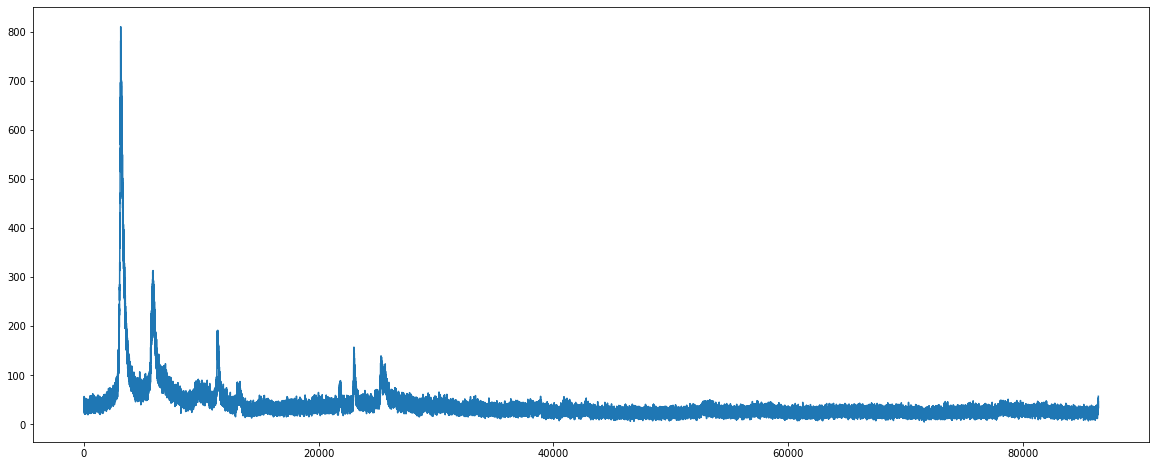

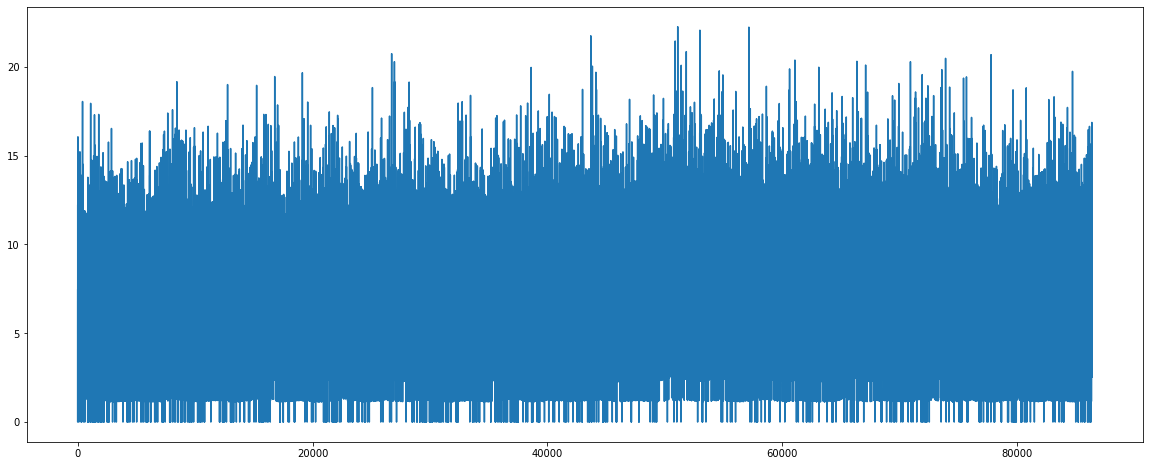

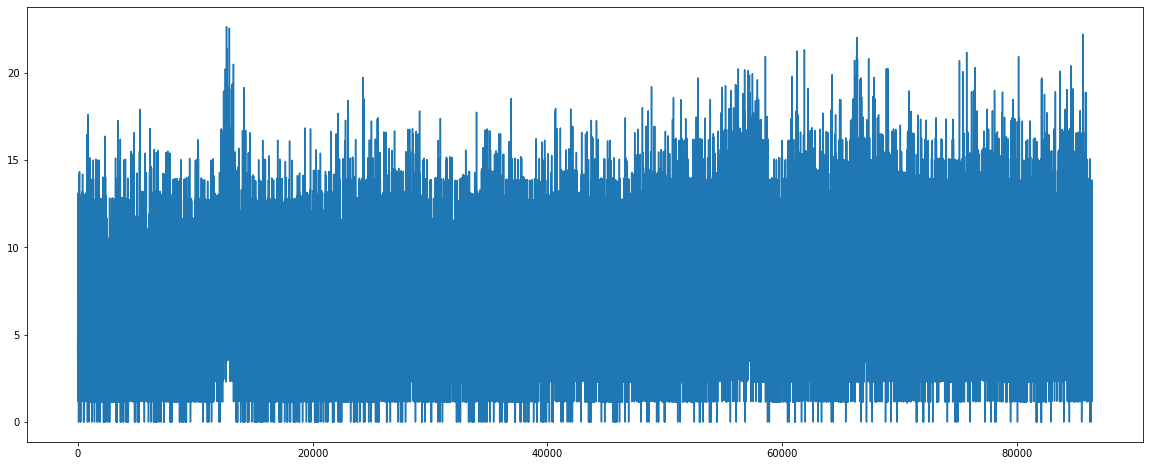

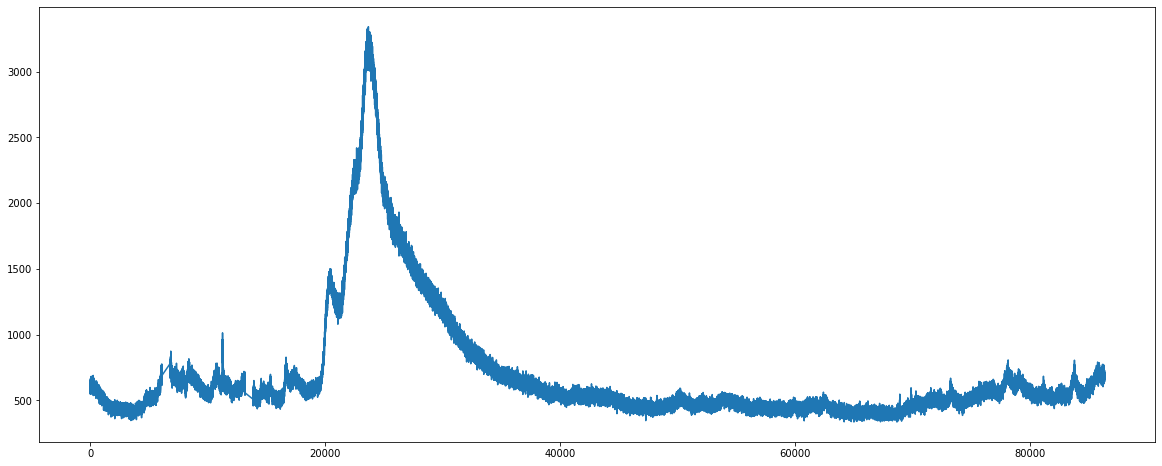

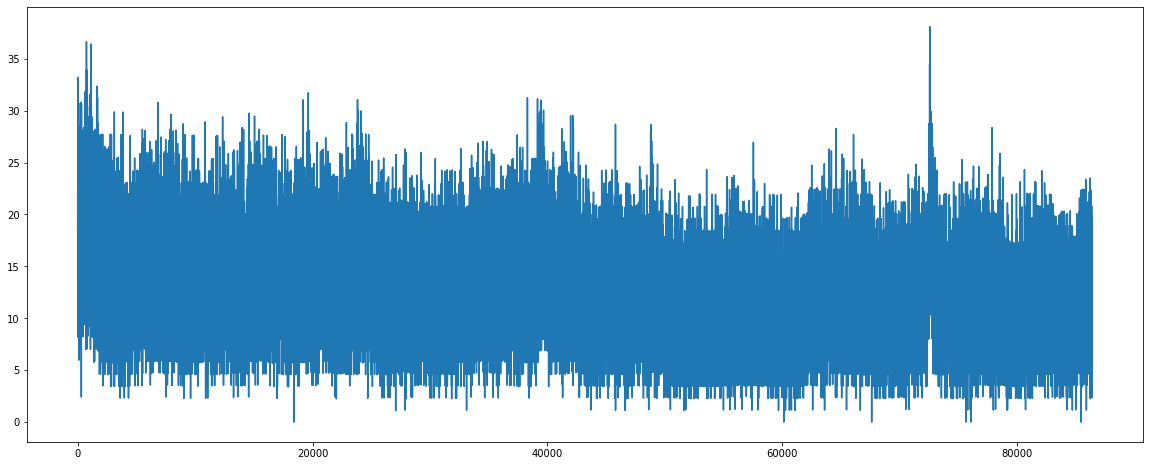

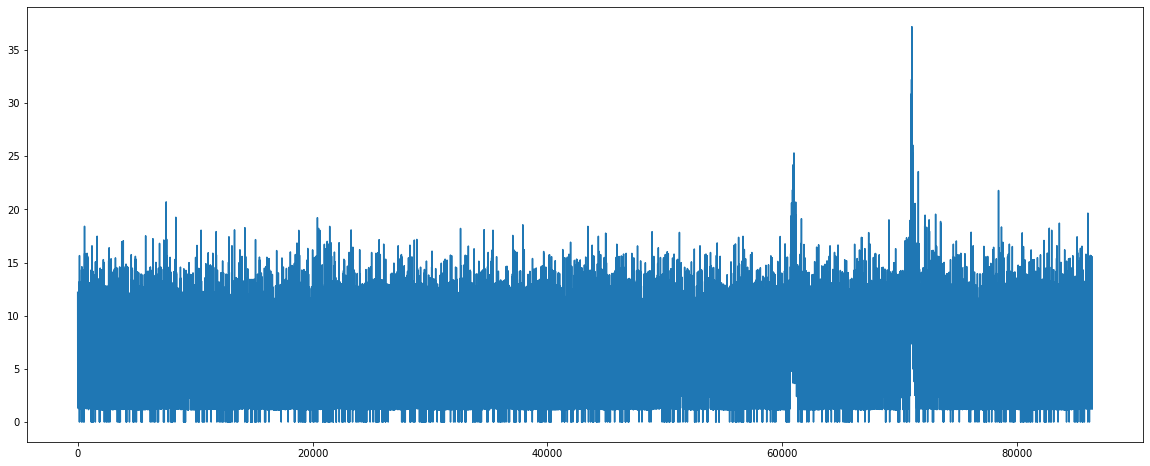

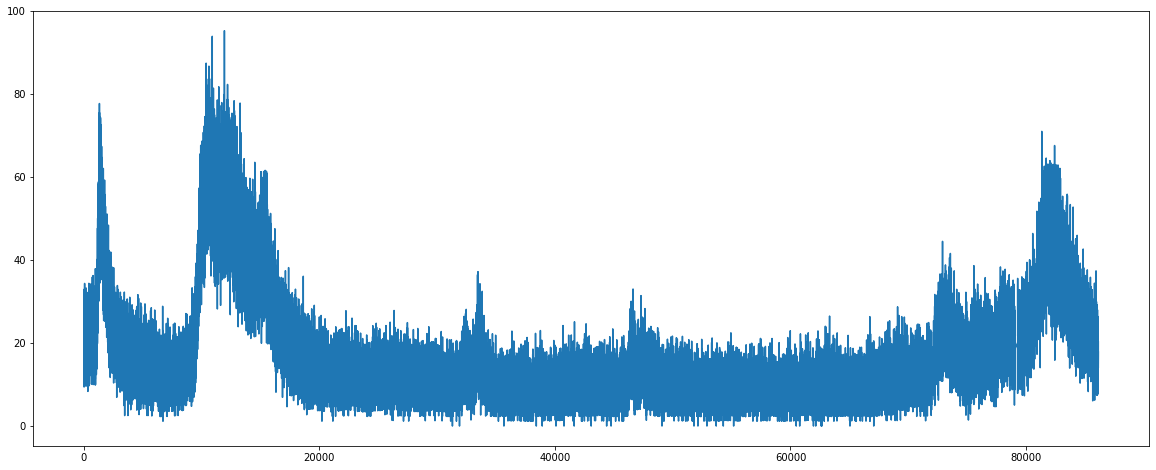

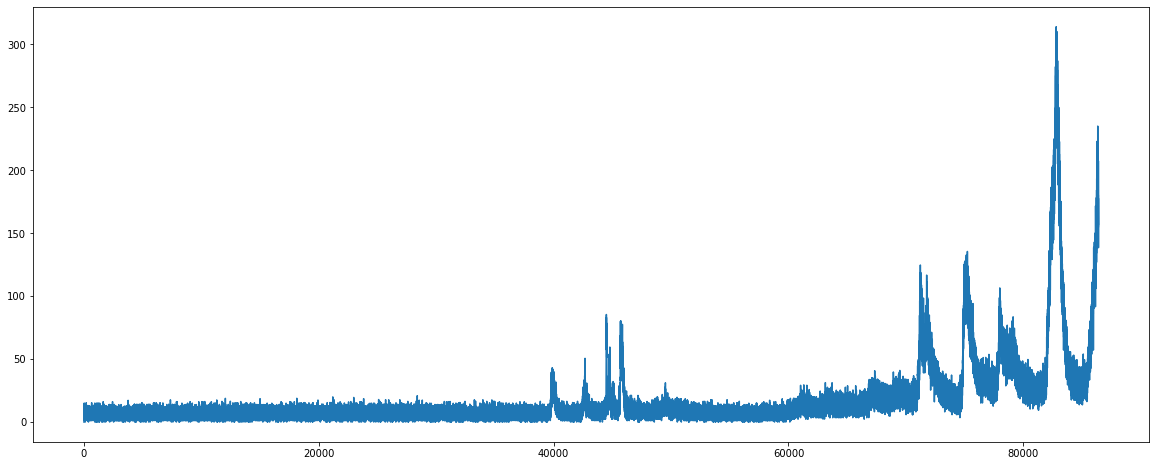

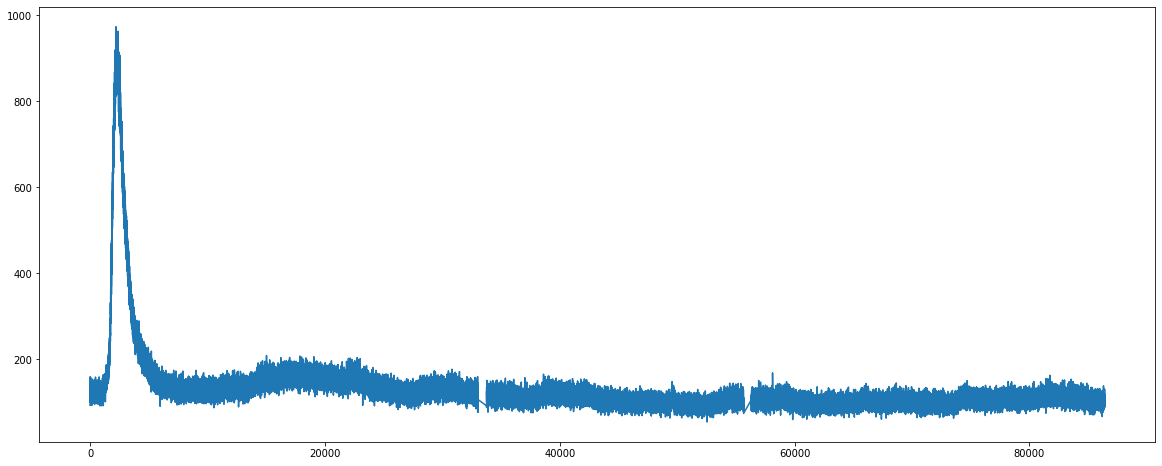

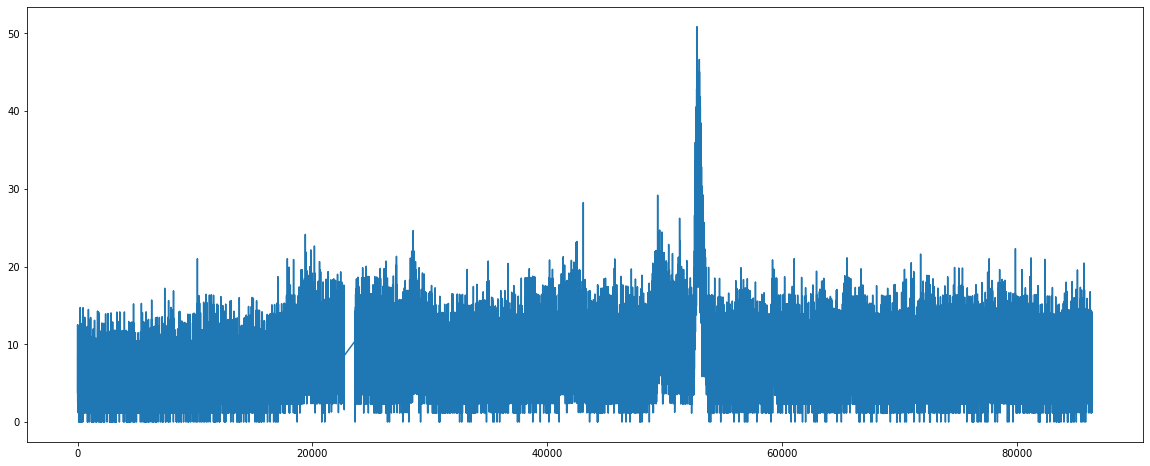

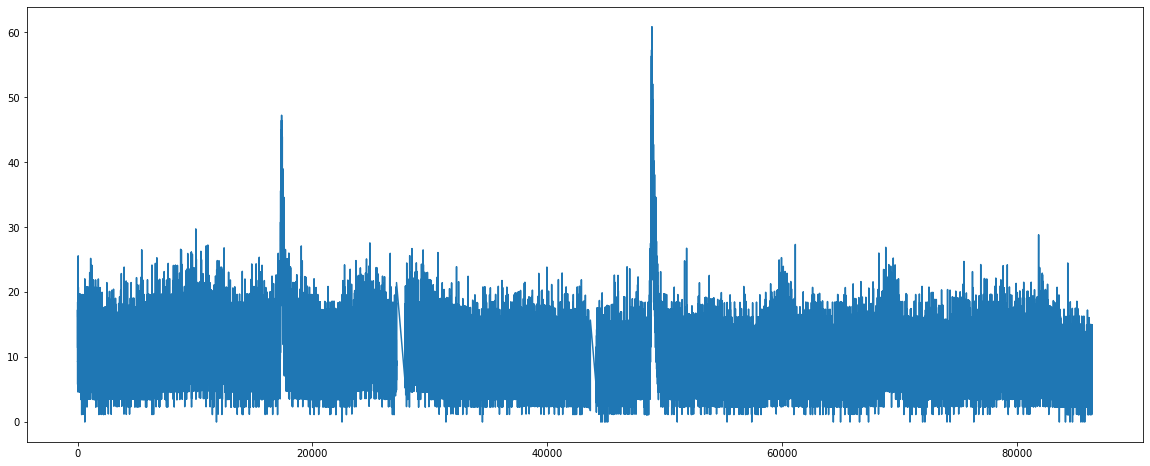

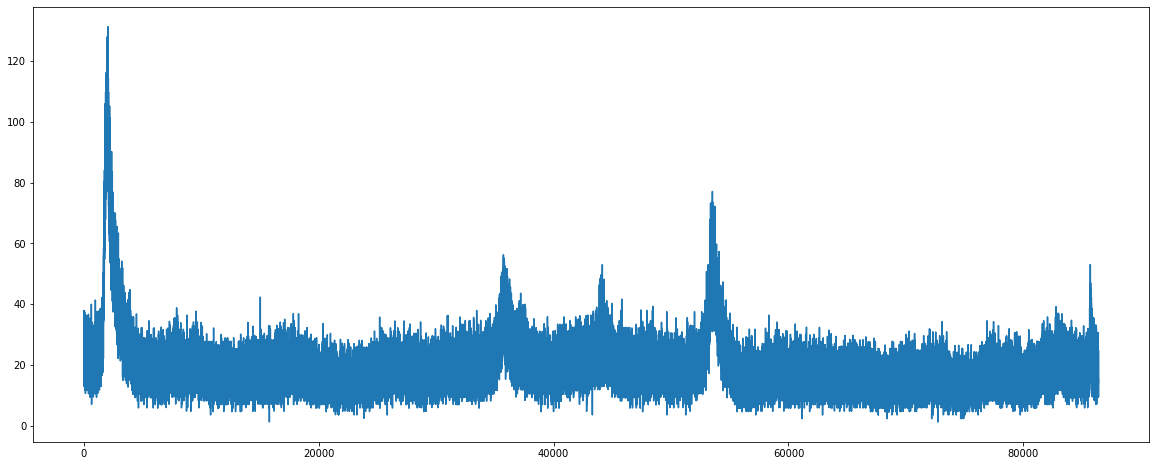

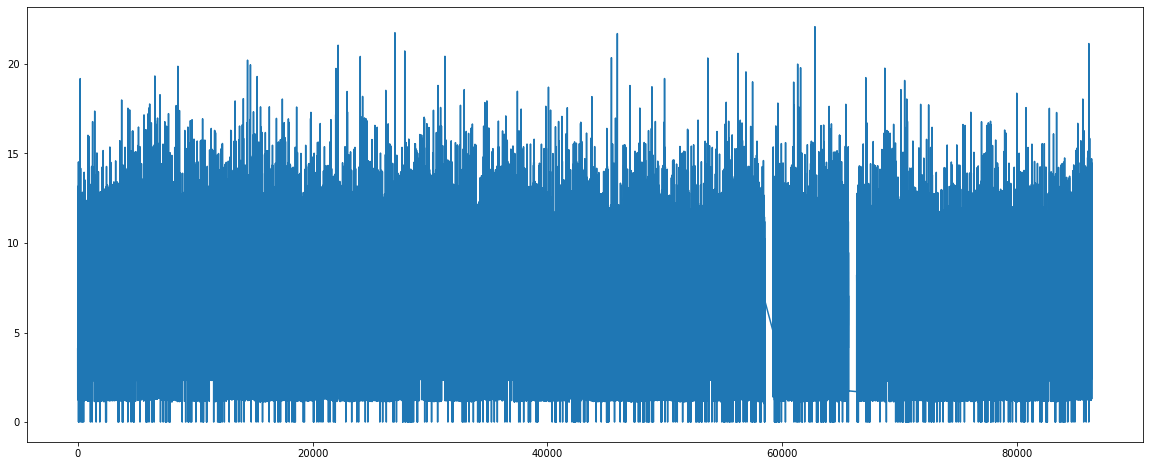

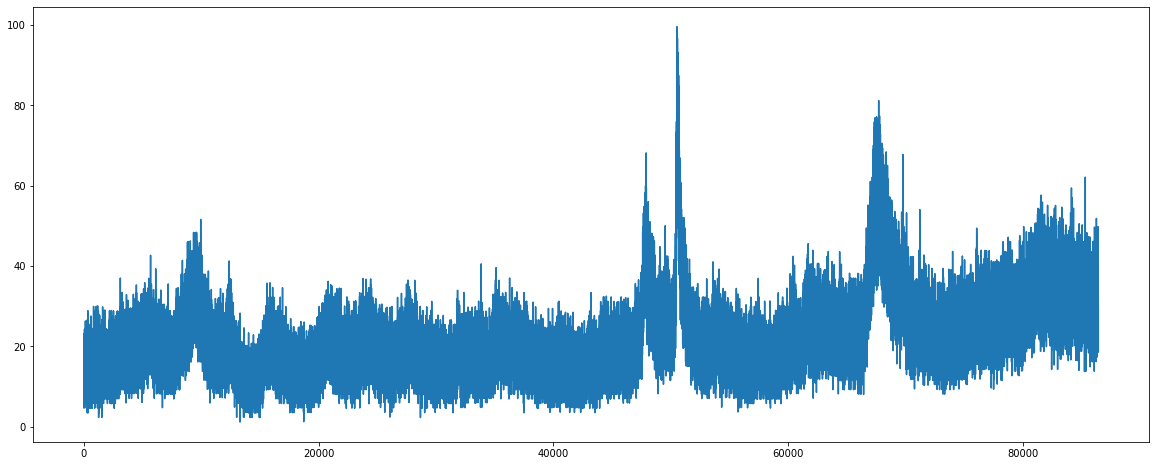

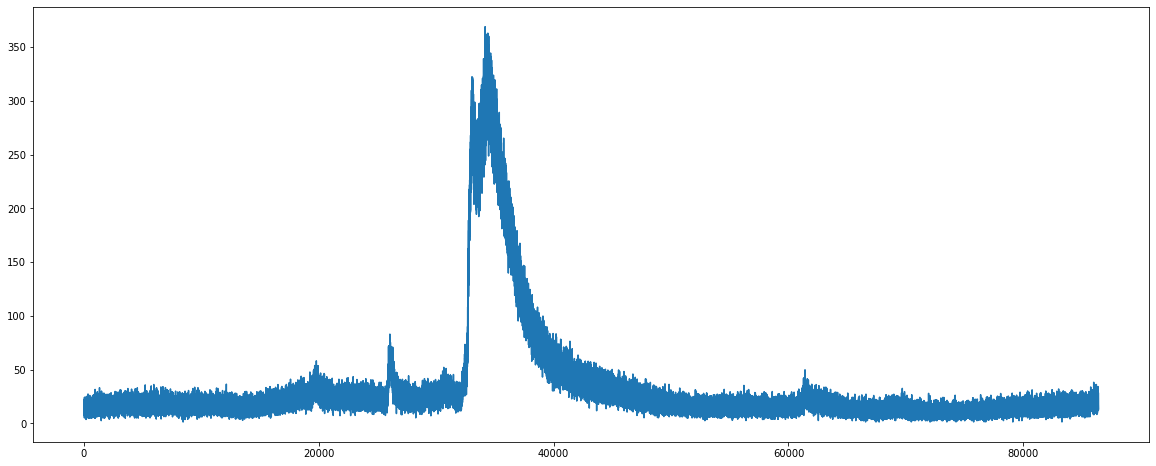

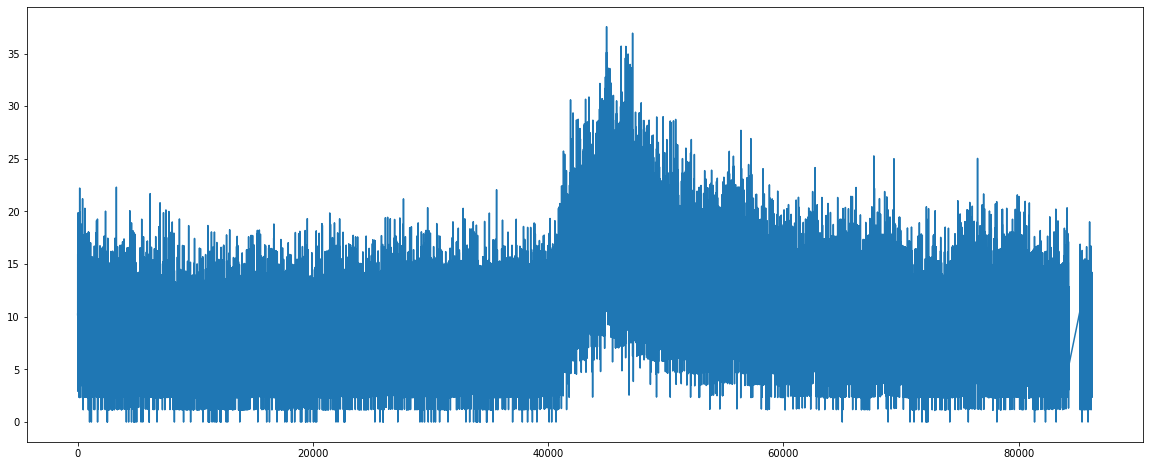

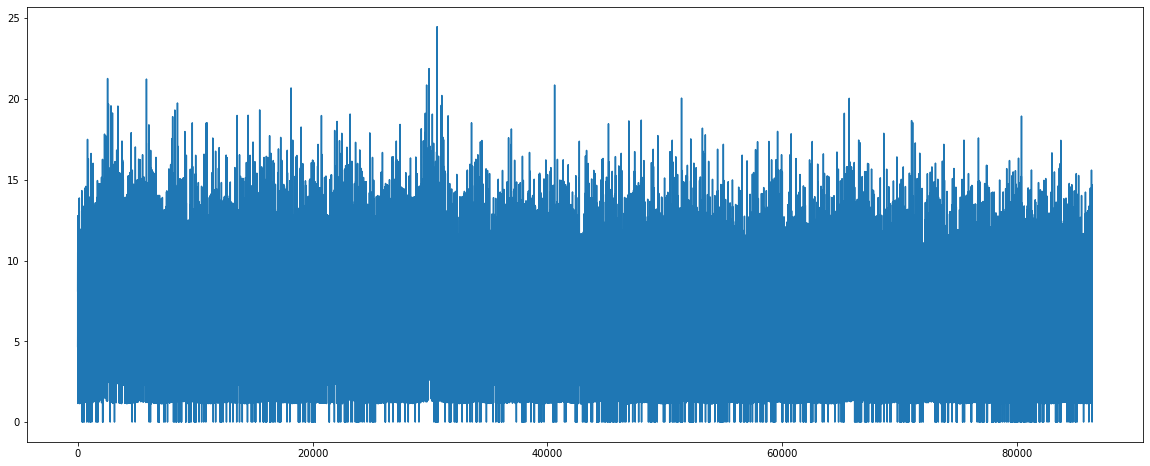

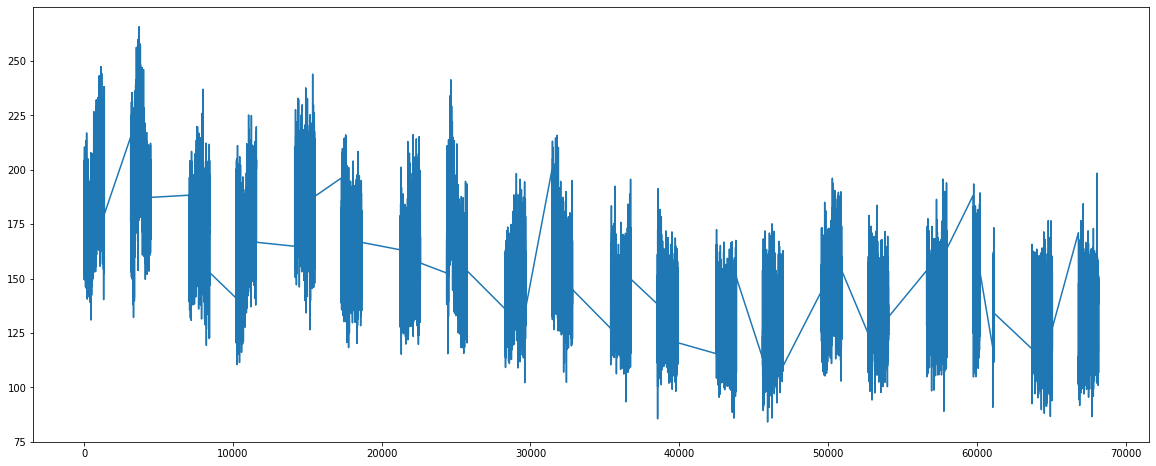

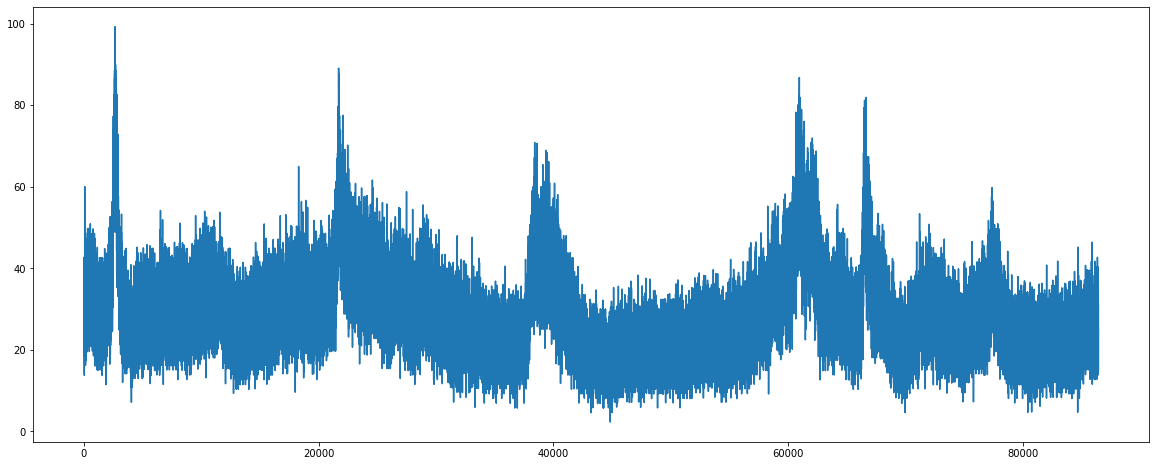

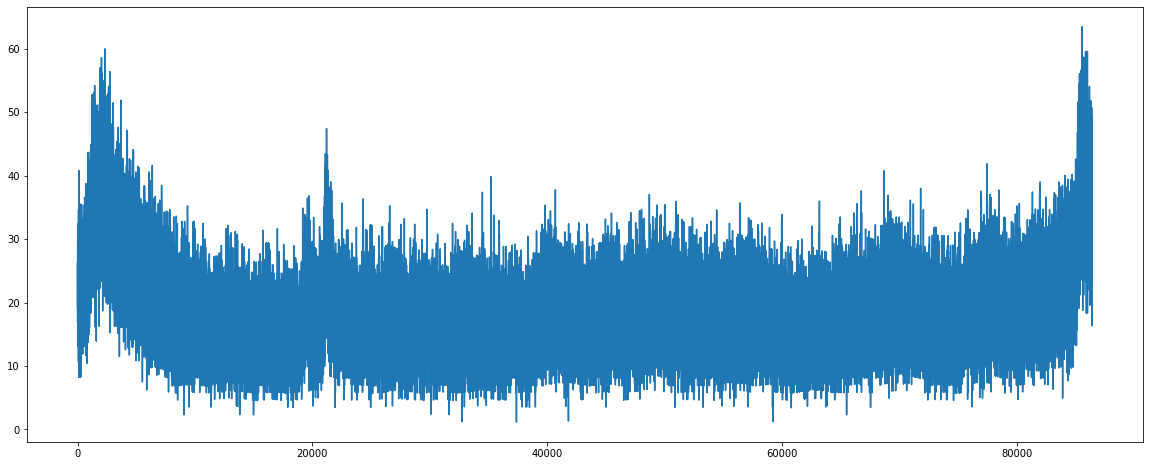

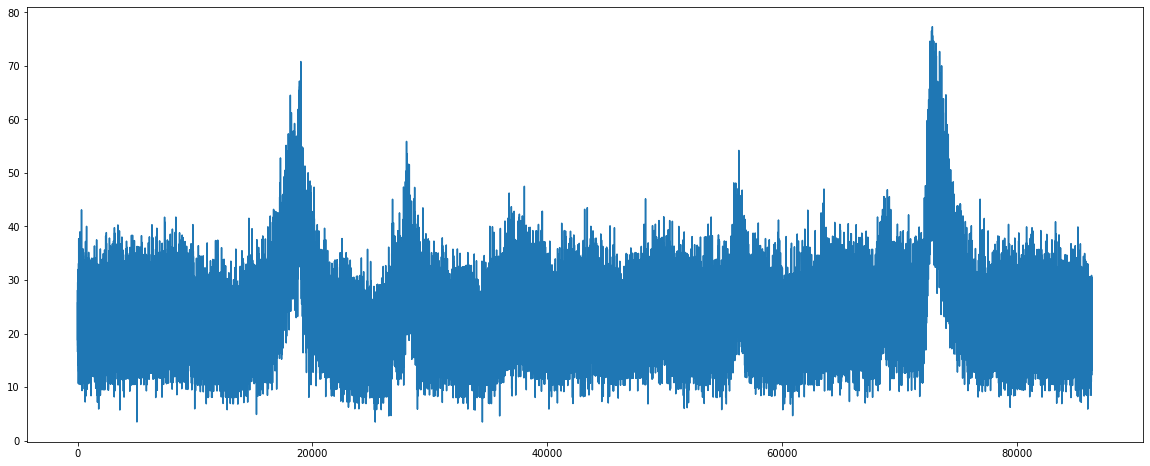

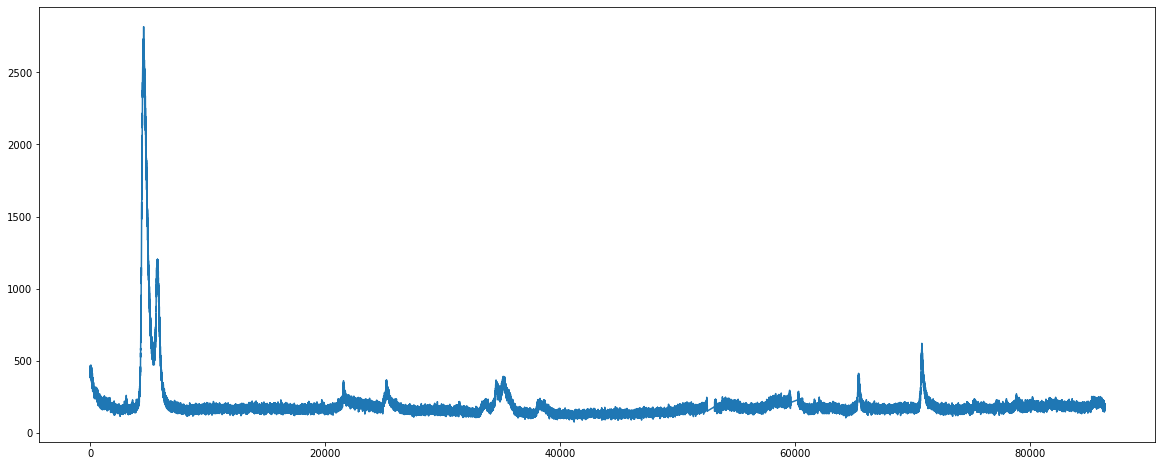

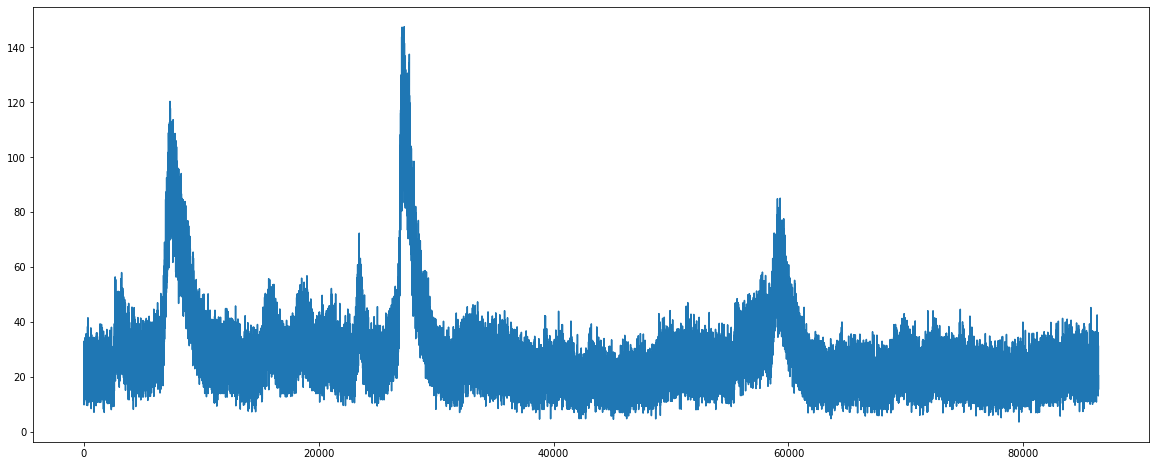

In [15]:
for x in LC_files:
    plot_portion(x)

In [16]:
for x in LC_files:
    convolve(x, 70)

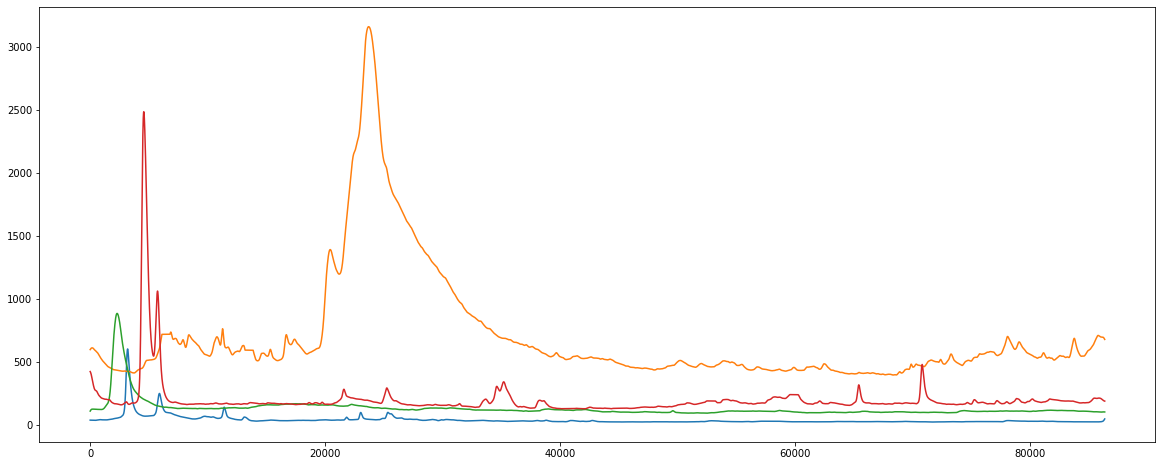

In [17]:
plt.figure(figsize=(20,8))
for x in LC_files:
    if x['RATE'].max() >= 500:
        plt.plot(x['TIME'], x["RATE"])

plt.show()

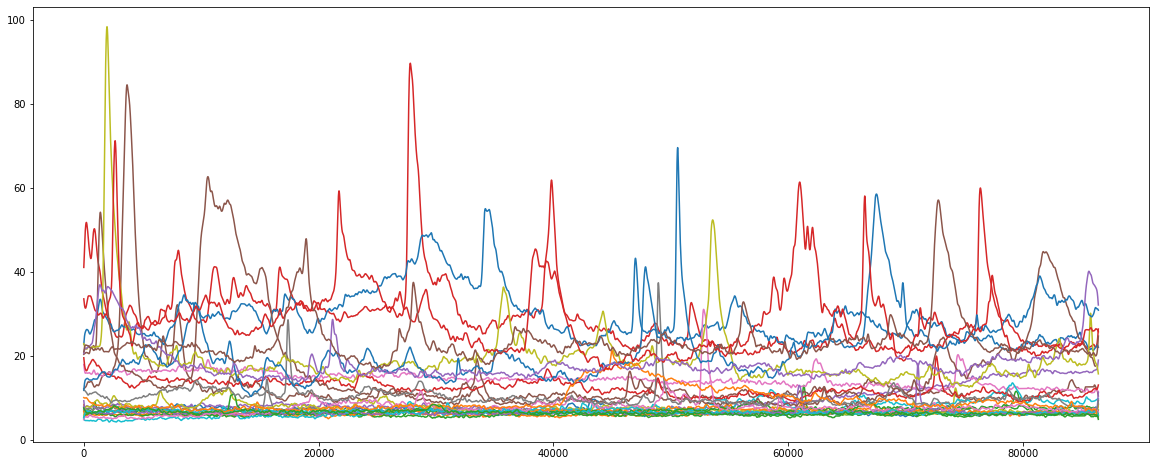

In [18]:
plt.figure(figsize=(20,8))
for x in LC_files:
    if x['RATE'].max() < 100:
        plt.plot(x['TIME'], x["RATE"])

plt.show()

In [19]:
lc2=binner(lc1,20)

In [20]:
lc1.describe()

,TIME,RATE,ERROR,FRACEXP
count,86378.000000,86378.000000,86378.000000,86378.000000
mean,43209.851722,37.482182,5.672819,1.000116
std,24937.186717,48.269802,2.302177,0.010758
min,1.000000,3.416019,1.848248,1.000000
25%,21615.250000,21.529115,4.639779,1.000000
50%,43209.500000,26.456626,5.143576,1.000000
75%,64805.750000,33.411263,5.780248,1.000000
max,86400.000000,555.023743,23.558943,2.000000


In [21]:
convolve(lc1,70)

In [22]:
convolve(lc2,70)


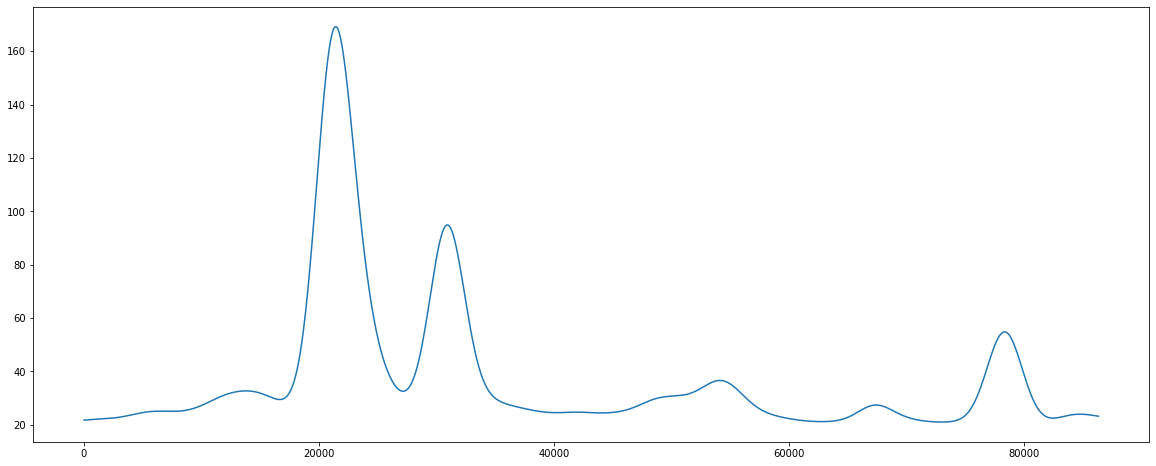

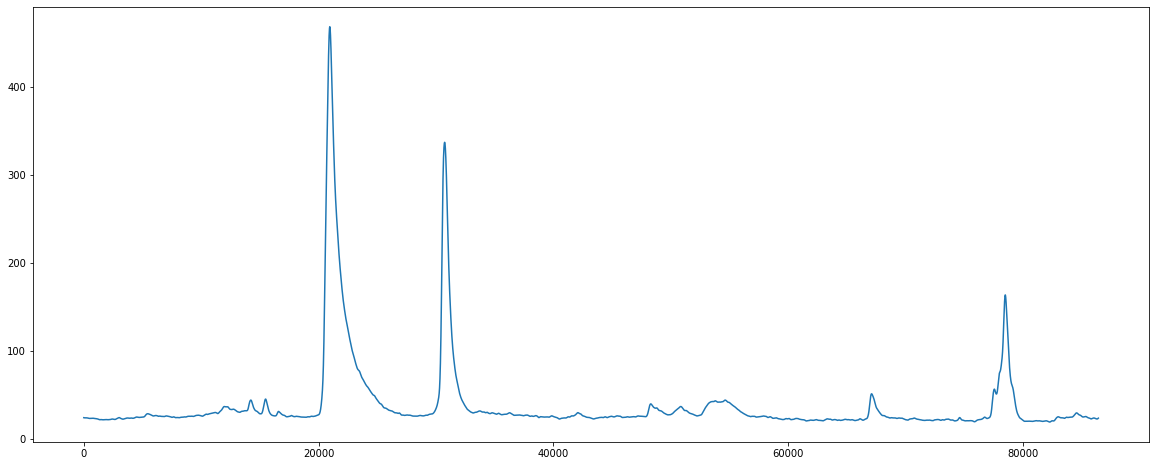

In [23]:
plot_portion(lc2)
plot_portion(lc1)

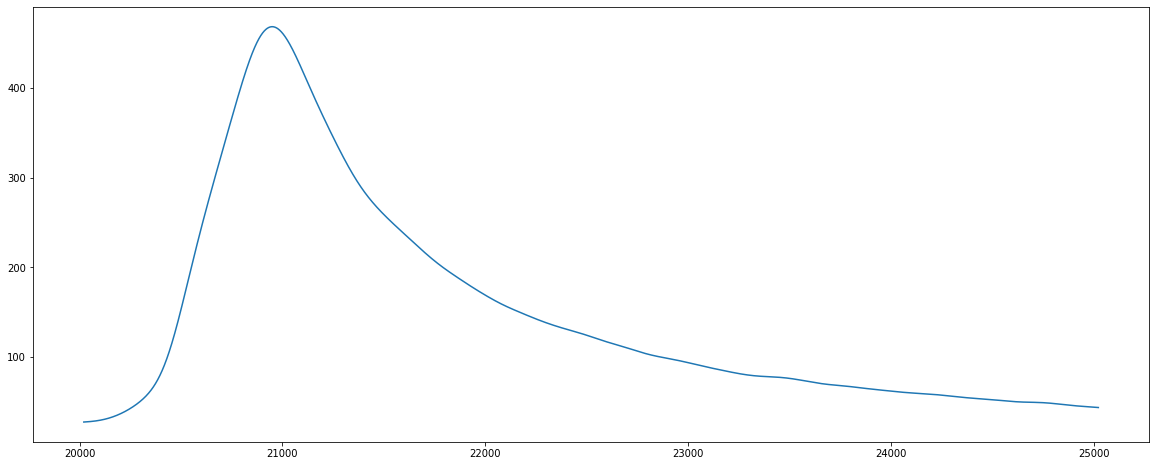

In [24]:
plot_portion(lc1[20000:25000])

In [25]:
a=find_peaks(lc2['RATE'],prominence=100)
a[0]
lc2['TIME'][a[0]]

1072    21441.0
Name: TIME, dtype: float64

In [26]:
width=peak_widths(lc2['RATE'],a[0],rel_height=0.1)

width


(array([76.48269032]),
 array([154.43032799]),
 array([1034.69429401]),
 array([1111.17698433]))

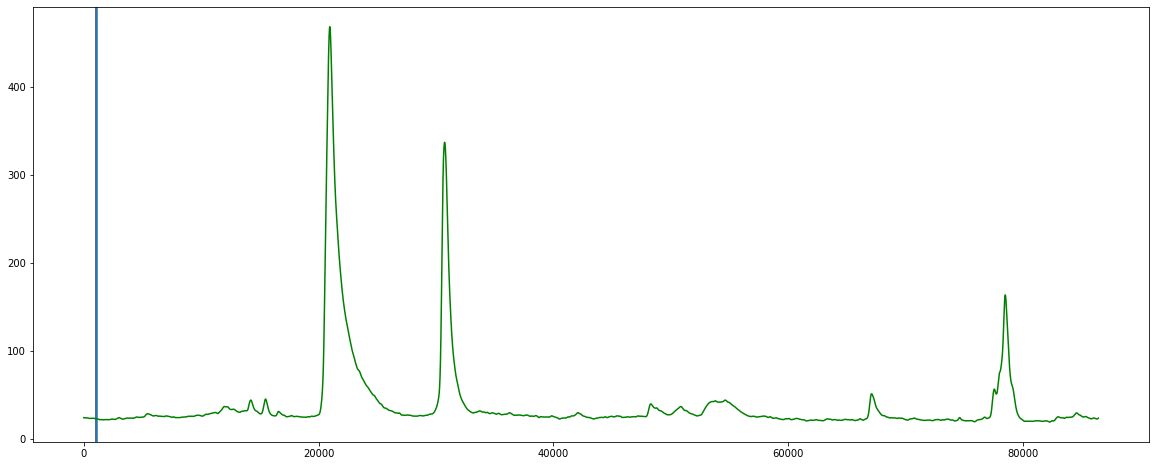

In [27]:


plt.figure(figsize = (20,8))
for idx in a[0]:

   plt.axvline(x = lc1['TIME'][idx],color='r')
for i in np.trunc(width[2]):
   plt.axvline(x=lc1['TIME'][i])
for i in np.trunc(width[3]):
   plt.axvline(x=lc1['TIME'][i])
plt.plot(lc1['TIME'],lc1['RATE'],color='g')
   
 

In [28]:
#plot_portion(lc1[int(width[0][3]):int(width[0][3])])

In [29]:
#movingavg(lc1)
type(lc1)


pandas.core.frame.DataFrame

In [30]:
t = lc2["TIME"][:1000]#[int(width[2][1]):int(width[3][1])]
#t = t - lc1["TIME"][1500]
rate = lc2["RATE"][:1000]#[int(width[2][1]):int(width[3][1])]


In [31]:
'''
def err_func(B, C, D, T):
    l = []
    for t in T:
        l.append(math.erfc((B+C**2*D-t)/math.sqrt(2)/C))
    return np.array(l)

def gauss_func(x, A, B, C):
    return A*np.exp(-(x-B)**2/2/C**2)

def exp_decay(x, D):
    return np.exp(-D*x)

def new_obj_func(x, A, B, C, D):
    return np.convolve(gauss_func(x, A, B, C), exp_decay(x, D), mode = 'full')

def obj_cost_func(params, x, y):
    a0, b0, c0, d0 = params[0], params[1], params[2], params[3]
    return np.sqrt((y - new_obj_func(x, a0, b0, c0, d0))**2)
'''

"\ndef err_func(B, C, D, T):\n    l = []\n    for t in T:\n        l.append(math.erfc((B+C**2*D-t)/math.sqrt(2)/C))\n    return np.array(l)\n\ndef gauss_func(x, A, B, C):\n    return A*np.exp(-(x-B)**2/2/C**2)\n\ndef exp_decay(x, D):\n    return np.exp(-D*x)\n\ndef new_obj_func(x, A, B, C, D):\n    return np.convolve(gauss_func(x, A, B, C), exp_decay(x, D), mode = 'full')\n\ndef obj_cost_func(params, x, y):\n    a0, b0, c0, d0 = params[0], params[1], params[2], params[3]\n    return np.sqrt((y - new_obj_func(x, a0, b0, c0, d0))**2)\n"

In [32]:
import math 
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.optimize import leastsq
from scipy.special import erf
%config InLineBackend.figure_format = 'retina'

def z_func(B, C, D):
    return (2*B + (C**2)*D)/(2*C)

def objective_func(T, A, B, C, D, E, F):
    #return A*T**4 + B*T**3 + C*T**2 + D*T + E
    return math.sqrt(np.pi*0.5)*A*C*np.exp(D/2*((2*B)+(C**2)*(D/2)-(2*(T*E+ F))))*(erf(z_func(B, C, D))- erf(z_func(B, C, D) - (T*E+ F)/C))
    #return A*np.exp(-(T-B)**2/(2*C**2))+np.exp(-D*T)
    
def objective_cost_func(params, x, y):
    a0, b0, c0, d0, e0, f0 = params[0], params[1], params[2], params[3], params[4], params[5]
    return np.sqrt(((y - objective_func(x, a0, b0, c0, d0, e0, f0))**2)/y)
    


def min_max_scaler(df):
    df['RATESCALED'] = (df['RATE']- df['RATE'].min())/(df['RATE'].max()- df['RATE'].min())
    df['TIMESCALED'] = (df['TIME']- df['TIME'].min())/(df['TIME'].max()- df['TIME'].min())*2 

In [33]:
min_max_scaler(lc1)

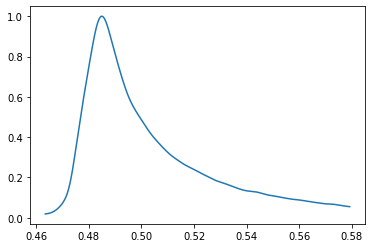

In [34]:
plt.plot(lc1['TIMESCALED'][20000:25000], lc1['RATESCALED'][20000:25000])

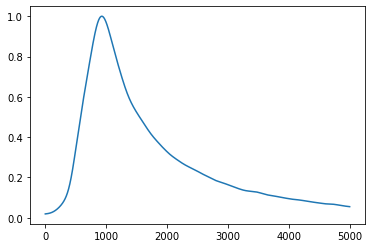

In [35]:
TIME = lc1['TIME'][20000:25000] - lc1['TIME'][20000]
RATE = lc1['RATESCALED'][20000:25000] #objective_func(TIME, 0.2, 0.3, 0.3, 0.4) #   
plt.plot(TIME, RATE)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


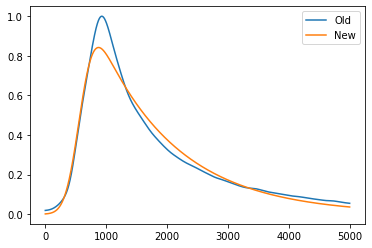

In [36]:
#arbArgs, _ = curve_fit(new_obj_func, t, rate, method = 'lm')
params = [0.2, 0.3, 0.3, 0.4, 0.1, 0.1]
#params = [a, b, c, d] 
resultsq = leastsq(objective_cost_func, params, (TIME, RATE))
a, b, c, d, e, f = resultsq[0][0], resultsq[0][1], resultsq[0][2], resultsq[0][3], resultsq[0][4], resultsq[0][5]

#A, B, C, D = arbArgs

new_curve = objective_func(TIME, a, b, c, d, e, f)

plt.plot(TIME, RATE)
plt.plot(TIME, new_curve)
plt.legend(["Old", "New"])
plt.show()

In [37]:
print(a, '\n', b, '\n', c, '\n', d, '\n', e, '\n', f)

0.5389419058170506 
 3.7798690453447787 
 0.8403837117489031 
 0.24574917877759184 
 0.0031777042728935246 
 1.9602742371429631


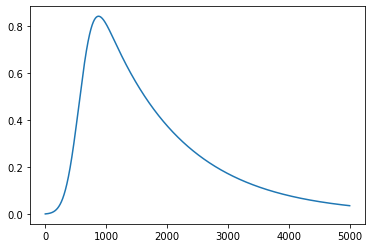

In [38]:
plt.plot(TIME, new_curve)

In [39]:
import math 
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.optimize import leastsq
from scipy.special import erf
%config InLineBackend.figure_format = 'retina'

def z_func(B, C, D):
    return (2*B + (C**2)*D)/(2*C)

def objective_func(T, A, B, C, D, E, F):
    #return A*T**4 + B*T**3 + C*T**2 + D*T + E
    return math.sqrt(np.pi*0.5)*A*C*np.exp(D/2*((2*B)+(C**2)*(D/2)-(2*(T*E+ F))))*(erf(z_func(B, C, D))- erf(z_func(B, C, D) - (T*E+ F)/C))
    #return A*np.exp(-(T-B)**2/(2*C**2))+np.exp(-D*T)
    
def objective_cost_func(params, x, y):
    a0, b0, c0, d0, e0, f0 = params[0], params[1], params[2], params[3], params[4], params[5]
    return np.sqrt(((y - objective_func(x, a0, b0, c0, d0, e0, f0))**2)/y)
    
def min_max_scaler(df):
    df['RATESCALED'] = (df['RATE']- df['RATE'].min())/(df['RATE'].max()- df['RATE'].min())
    df['TIMESCALED'] = (df['TIME']- df['TIME'].min())/(df['TIME'].max()- df['TIME'].min())*2

def rev_scaler(df):
    df['TRUEFIT'] = df['FIT']*(df['RATE'].max()- df['RATE'].min()) + df['RATE'].min()

In [52]:
peak_list, _ = find_peaks(lc1['RATE'], distance= lc1['RATE'].median()*1.005)
peak_list

array([  233,   752,   973,  1454,  1850,  2171,  2396,  3003,  3716,
        4014,  4488,  4825,  5429,  6111,  6450,  6682,  7002,  7626,
        7928,  8541,  8922,  9143,  9558,  9733, 10412, 11182, 11950,
       12188, 12720, 13480, 13672, 14204, 15460, 16565, 17656, 18097,
       18843, 19076, 19373, 20928, 26158, 26574, 26847, 27141, 27486,
       27731, 28101, 28268, 28621, 29106, 30709, 33314, 33705, 34036,
       34315, 34755, 35295, 35808, 36240, 36755, 37065, 37234, 37728,
       38115, 38469, 38888, 39028, 39297, 39476, 39828, 40845, 41235,
       41541, 42060, 42959, 44030, 44380, 44895, 45405, 45619, 45954,
       46273, 46746, 47190, 47416, 48261, 48758, 49840, 50818, 51246,
       53527, 53757, 54091, 54340, 54598, 56900, 57059, 57491, 57851,
       58054, 58427, 58934, 59776, 60035, 60304, 60653, 61646, 61873,
       62345, 62758, 63286, 63540, 63919, 64284, 64837, 65086, 65380,
       66087, 67066, 68107, 68760, 69021, 69396, 69621, 70692, 71455,
       71741, 71968,

In [55]:
lc1['RATE'][233]

23.593163

In [59]:
lc1.loc[200:240, "RATE"]

200    23.584602
201    23.584969
202    23.585348
203    23.585711
204    23.586098
205    23.586473
206    23.586840
207    23.587196
208    23.587570
209    23.587921
210    23.588280
211    23.588623
212    23.588966
213    23.589287
214    23.589605
215    23.589918
216    23.590221
217    23.590517
218    23.590809
219    23.591070
220    23.591331
221    23.591578
222    23.591812
223    23.592037
224    23.592243
225    23.592438
226    23.592606
227    23.592749
228    23.592869
229    23.592993
230    23.593067
231    23.593136
232    23.593161
233    23.593163
234    23.593157
235    23.593111
236    23.593040
237    23.592939
238    23.592838
239    23.592697
240    23.592520
Name: RATE, dtype: float32

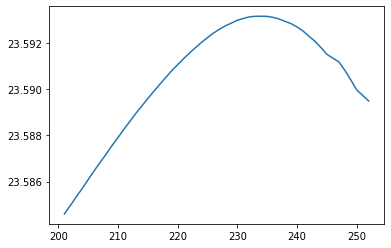

In [61]:
plt.plot(lc1['TIME'][200:250], lc1['RATE'][200:250])

In [64]:
from scipy.signal import find_peaks

def tolerence_func(r, mid, start, stop):
    if mid - start < 0:
        start = 0
    else:
        start = mid - start
    if mid + stop > r:
        stop = r
    else:
        stop = mid + stop
    return start, stop

def peak_fitter(df):
    peak_list, _ = find_peaks(df['RATE'], distance= df['RATE'].median()*1.005)
    min_max_scaler(df)
    df['FIT'] = None
    for peak in peak_list:
        
        start, stop = tolerence_func(len(df), peak, t1, t2)
        TIME = df['TIMESCALED'][start:stop]
        RATE = df['RATESCALED'][start:stop]

        params = [0.2, 0.3, 0.3, 0.4, 0.1, 0.1]

        resultsq = leastsq(objective_cost_func, params, (TIME, RATE))
        a, b, c, d, e, f = resultsq[0][0], resultsq[0][1], resultsq[0][2], resultsq[0][3], resultsq[0][4], resultsq[0][5]


        new_curve = objective_func(TIME, a, b, c, d, e, f)

        df['FIT'][start:stop] = new_curve
        rev_scaler(df)
    
    plt.plot(df['TIME'], df['TRUEFIT'])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:454: RuntimeWarning: Number of calls to function has reached maxfev = 1400.
  warnings.warn(errors[info][0], RuntimeWarning)


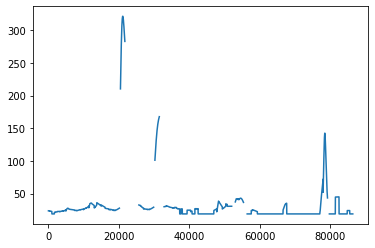

In [65]:
peak_fitter(lc1)